# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import necessary libraries
import pandas as pd
import requests
import tweepy 
import json

> Read csv from provided url

In [3]:
csv_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
df_1 = pd.read_csv(csv_url)
df_1.head()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
image_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(image_url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
#api handling info
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

In [6]:
#oAuth for twitter api access

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, 
                 retry_count=1,
                 retry_errors=[88], # Rate limit reached, this section added with WGU instructor recommendation
                 wait_on_rate_limit=True) # recommended by lesson 4.5
                 

In [7]:
json_file = 'tweet_json.txt' #file name to write to

#stores tweet ids that no longer exist
tweet_id_na = []

In [8]:
# This loop writes json data to file

with open(json_file, 'w') as file:
    for tweet_id in df_1['tweet_id']:
        try:
            query = api.get_status(tweet_id, tweet_mode='extended')
            print('{} success!'.format(tweet_id))
            json.dump(query._json, file)
            file.write('\n')
        except Exception as e:
            tweet_id_na.append(tweet_id)
            print('{} failed'.format(tweet_id))

892420643555336193 success!
892177421306343426 success!
891815181378084864 success!
891689557279858688 success!
891327558926688256 success!
891087950875897856 success!
890971913173991426 success!
890729181411237888 success!
890609185150312448 success!
890240255349198849 success!
890006608113172480 success!
889880896479866881 success!
889665388333682689 success!
889638837579907072 success!
889531135344209921 success!
889278841981685760 success!
888917238123831296 success!
888804989199671297 success!
888554962724278272 success!
888202515573088257 failed
888078434458587136 success!
887705289381826560 success!
887517139158093824 success!
887473957103951883 success!
887343217045368832 success!
887101392804085760 success!
886983233522544640 success!
886736880519319552 success!
886680336477933568 success!
886366144734445568 success!
886267009285017600 success!
886258384151887873 success!
886054160059072513 success!
885984800019947520 success!
885528943205470208 success!
885518971528720385 suc

Rate limit reached. Sleeping for: 541


783466772167098368 failed
783391753726550016 success!
783347506784731136 success!
783334639985389568 success!
783085703974514689 success!
782969140009107456 success!
782747134529531904 success!
782722598790725632 success!
782598640137187329 success!
782305867769217024 success!
782021823840026624 success!
781955203444699136 success!
781661882474196992 success!
781655249211752448 success!
781524693396357120 success!
781308096455073793 success!
781251288990355457 success!
781163403222056960 success!
780931614150983680 success!
780858289093574656 success!
780800785462489090 success!
780601303617732608 success!
780543529827336192 success!
780496263422808064 success!
780476555013349377 success!
780459368902959104 success!
780192070812196864 success!
780092040432480260 success!
780074436359819264 success!
779834332596887552 success!
779377524342161408 success!
779124354206535695 success!
779123168116150273 failed
779056095788752897 success!
778990705243029504 success!
778774459159379968 succe

Rate limit reached. Sleeping for: 727


684959798585110529 success!
684940049151070208 failed
684926975086034944 success!
684914660081053696 success!
684902183876321280 success!
684880619965411328 success!
684830982659280897 success!
684800227459624960 success!
684594889858887680 success!
684588130326986752 success!
684567543613382656 success!
684538444857667585 success!
684481074559381504 success!
684460069371654144 success!
684241637099323392 success!
684225744407494656 success!
684222868335505415 success!
684200372118904832 success!
684195085588783105 success!
684188786104872960 success!
684177701129875456 success!
684147889187209216 success!
684122891630342144 success!
684097758874210310 success!
683857920510050305 success!
683852578183077888 success!
683849932751646720 success!
683834909291606017 success!
683828599284170753 success!
683773439333797890 success!
683742671509258241 success!
683515932363329536 success!
683498322573824003 success!
683481228088049664 success!
683462770029932544 success!
683449695444799489 suc

In [9]:
tweet_info_list = []
with open(json_file) as file:
    for line in file:
        tweet_info_list.append(json.loads(line))

In [10]:
#turn list into dataframe
tweet_info = pd.DataFrame(tweet_info_list, columns = ['id', 'retweet_count','favorite_count'])

tweet_info = tweet_info.rename(columns={"id": "tweet_id"})
tweet_info.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7121,34282
1,892177421306343426,5364,29720
2,891815181378084864,3530,22369
3,891689557279858688,7316,37440
4,891327558926688256,7870,35765


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### df_1 Assessment

I will review use some pandas overview on a few items to find data issues

In [11]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


We see a couple of rows that are mostly NaN or None. This is an incompleteness issue

In [12]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

`tweet_id` and `timestamp` are incorrect data types. `timestamp` should be timestamp data types. `tweet_id` should not be an integer. Despite it being a number, it is a datapoint that is not being used to calculate. I bet this is the same accross the rest of the `tweet_id` columns in other dataframes

In [13]:
df_1['tweet_id'].dtype, image_prediction['tweet_id'].dtype, tweet_info['tweet_id'].dtype

(dtype('int64'), dtype('int64'), dtype('int64'))

A consistent error is a a nice easy one to fix!

WeRateDogs primarily uses an x/10 scale to rate. Data analysis is much easier if we conform to a standard. First, let's ensure this data set's mode is 10 for the denomintor

In [14]:
import statistics as stats
stats.mode(df_1['rating_denominator'])

10

In [15]:
df_1[df_1['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [16]:
df_1.rating_denominator.value_counts(sort=True)

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

We have quite a few denominators that are not 10. Most of them are divisible by 10 and only 3 are below ten.

Dog names have a lot of values and variability. Let's review that group

In [17]:
df_1.name.value_counts(sort=True)

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

There are a lot of values here. First I want to note that there is a large number of None which should be NaN/Null. Let's check for names assigned incorrectly, a fast way is to find names that are all lowercase letters.

In [18]:
df_1[df_1.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

Quite a few 'names" here

CHecking for duplicate rows is very important.

In [19]:
df_1.duplicated().sum()

0

Poggers, no duplicates!

Checking the source row is also important. Twitter at one point had integrated other services such as Facebook and Vine to source tweets.

In [20]:
df_1[~df_1['source'].str.contains('twitter')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
529,808344865868283904,NaN,NaN,2016-12-12 16:16:49 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Seamus. He's very bad at entering pool...,NaN,NaN,NaN,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None
672,789903600034189313,NaN,NaN,2016-10-22 18:57:48 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ralphy. His dreams were just shattered...,NaN,NaN,NaN,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
699,786286427768250368,NaN,NaN,2016-10-12 19:24:27 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Arnie. He's afraid of his own bark. 12...,NaN,NaN,NaN,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,676916996760600576,NaN,NaN,2015-12-16 00:09:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Super speedy pupper. Does not go gentle into t...,NaN,NaN,NaN,https://vine.co/v/imJ0BdZOJTw,10,10,None,None,None,pupper,None
1818,676593408224403456,NaN,NaN,2015-12-15 02:43:33 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This pupper loves leaves. 11/10 for committed ...,NaN,NaN,NaN,https://vine.co/v/eEQQaPFbgOY,11,10,None,None,None,pupper,None
1834,676121918416756736,NaN,NaN,2015-12-13 19:30:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here we are witnessing a very excited dog. Cle...,NaN,NaN,NaN,https://vine.co/v/iZXg7VpeDAv,8,10,None,None,None,None,None
1916,674307341513269249,NaN,NaN,2015-12-08 19:19:32 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is life-changing. 12/10 https://t.co/SroT...,NaN,NaN,NaN,https://vine.co/v/i7nWzrenw5h,12,10,life,None,None,None,None


91 rows that will need to be dropped as vine is no longer accessible.

In [21]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


There are some confusing headers here. What does img_num and p1/_conf/_dog mean?



In [22]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image_prediction.duplicated().sum()

0

No duplicates, a great sign!

twimg.com seems to be the default twitter image. Let's see if there are values that do not conform to that url.

In [24]:
image_prediction.loc[~image_prediction['jpg_url'].str.contains("twimg", case=False)]


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [25]:
tweet_info

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7121,34282
1,892177421306343426,5364,29720
2,891815181378084864,3530,22369
3,891689557279858688,7316,37440
4,891327558926688256,7870,35765
...,...,...,...
2321,666049248165822465,37,91
2322,666044226329800704,117,251
2323,666033412701032449,36,102
2324,666029285002620928,39,115


In [26]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2326 non-null   int64
 1   retweet_count   2326 non-null   int64
 2   favorite_count  2326 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [27]:
tweet_info.duplicated().sum()

0

As expected, this dataframe created from an API pull is pretty clean. Tweet ID is the wrong datatype as we saw up at the top.

### Quality issues
#### df_1
1. tweet ID is an integer

2. timestamp is not timestamp data type

3. 181 retweets

4. invalid denominators

5. invalid dog names 

6. Invalid Links from vine.co

7. Ratings with decimal values incorrectly extracted - Quality issue

8. Some columns may be renamed to improve clarity

9. Dog breeds can be standardized

#### More to be discovered

A section called "Additional Cleaning" will be created to address issues as I iterate and discover.

### Tidiness issues
1. Doggo-floofer etc. should be 1 row as a Type category

2. 3 separate flat files are being used for one observational unit

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of original pieces of data
df_tweet = df_1.copy()
df_image = image_prediction.copy()
df_tweet_data = tweet_info.copy()

In [29]:
df_tweet.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [30]:
df_image.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [31]:
df_tweet_data

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7121,34282
1,892177421306343426,5364,29720
2,891815181378084864,3530,22369
3,891689557279858688,7316,37440
4,891327558926688256,7870,35765
...,...,...,...
2321,666049248165822465,37,91
2322,666044226329800704,117,251
2323,666033412701032449,36,102
2324,666029285002620928,39,115


### Issue #1: Tweet ID is an integer intead of a string.

> Since the tweet ID is not being  used for calculation but for reference as a name/identifier it should be stored as a string. This affects multiple dataframes

#### Define: 

> Using DataFrame.astype I will cast the integer into a string for tweet ID and User Ids

#### Code

In [32]:
df_tweet.tweet_id.dtype, df_tweet.in_reply_to_status_id.dtype, df_tweet.in_reply_to_user_id.dtype, df_image.tweet_id.dtype, df_tweet_data.tweet_id.dtype

(dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'))

In [33]:
df_tweet.tweet_id = df_tweet.tweet_id.astype(str)
df_tweet.in_reply_to_status_id = df_tweet.in_reply_to_status_id.astype(str)
df_tweet.in_reply_to_user_id = df_tweet.in_reply_to_user_id.astype(str)
df_image.tweet_id = df_image.tweet_id.astype(str)
df_tweet_data.tweet_id= df_tweet_data.tweet_id.astype(str)

#### Test

In [34]:
df_tweet['tweet_id'].dtype, df_tweet['in_reply_to_status_id'].dtype, df_tweet['in_reply_to_user_id'].dtype, df_image['tweet_id'].dtype, df_tweet_data['tweet_id'].dtype

(dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'))

> Each ID has been converted to a maximum 21 bit string

### Issue #2: timestamp is not timestamp data type

#### Define
> use pandas to_datetime function to convert to proper data type


#### Code

In [35]:
df_tweet['timestamp']= pd.to_datetime(df_tweet['timestamp'])

#### Test

In [36]:
df_tweet['timestamp'].dtype

datetime64[ns, UTC]

### Issue #3: 181 retweets

#### Define
> use an inplace drop to remove the retweets and another drop to remove responses to other users


#### Code

In [37]:
#remove non null retweet values
df_tweet
df_tweet = df_tweet[df_tweet.retweeted_status_id.isnull()]

In [38]:
df_tweet[df_tweet['in_reply_to_status_id'] == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [39]:
#remove columnds that are no longer relevant 'retweet...'
labels = ['retweeted_status_user_id', 'retweeted_status_timestamp','retweeted_status_id']   
df_tweet = df_tweet.drop(labels, axis=1)
df_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,nan,nan,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,nan,nan,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,nan,nan,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,nan,nan,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,nan,nan,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Test

In [40]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   object             
 1   in_reply_to_status_id  2175 non-null   object             
 2   in_reply_to_user_id    2175 non-null   object             
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   2175 non-null   object             
 10  doggo                  2175 non-null   object             
 11  floofer                2175 non-null   object           

### Issue #4: Invalid denominator in some rows. Each denominator needs to be 10, reduced to 10 or dropped.

#### 4.1 Numerators with 0

#### Define
> View row tweet and ensure correct n/d using df.at()


#### Code

In [41]:
df_tweet[df_tweet['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,None,None,None,None


In [42]:
df_tweet.at[313,'tweet_id']

'835246439529840640'

In [43]:
#still in row 313, still the only 0
#let's use oEmbed to see the source tweet
weratedogs_url = 'https://twitter.com/dog_rates/status/'
api.get_oembed(weratedogs_url + df_tweet.at[313,'tweet_id'])

{'url': 'https://twitter.com/dog_rates/status/835246439529840640',
 'author_name': 'WeRateDogs®',
 'author_url': 'https://twitter.com/dog_rates',
 'html': '<blockquote class="twitter-tweet"><p lang="en" dir="ltr">ok jomny I know you&#39;re excited but 960/00 isn&#39;t a valid rating, 13/10 is tho</p>&mdash; WeRateDogs® (@dog_rates) <a href="https://twitter.com/dog_rates/status/835246439529840640?ref_src=twsrc%5Etfw">February 24, 2017</a></blockquote>\n<script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>\n',
 'width': 550,
 'height': None,
 'type': 'rich',
 'cache_age': '3153600000',
 'provider_name': 'Twitter',
 'provider_url': 'https://twitter.com',
 'version': '1.0'}

In [44]:
# we see that this was a response rating and the data was input for the original value instead of what wrd input. Let's correct with the 13/10 value

In [45]:
df_tweet.at[313,'rating_denominator'] = 10
df_tweet.at[313,'rating_numerator'] = 13

#### Test

In [46]:
df_tweet['rating_numerator'].iloc[313], df_tweet['rating_denominator'].iloc[313]

(14, 10)

> The indexed location for numerator and denominator has been fixed based on tweet text

#### Issue 4.2: Fix other non 10 denominators in table

#### Define

> There are other denomintaors that aren't in line with the tpyical x/10 rating for WRD. I will drop rows where there is no rating in the tweet, reduce to N/10 where possible

### Code

In [47]:
#setting relevant columns to view in list
view_columns = ['tweet_id', "text", "rating_numerator", "rating_denominator"]

In [48]:
pd.options.display.max_colwidth = 140 #set to old max twitter length to view columns easily 
df_tweet[df_tweet['rating_denominator'] != 10].loc[:, view_columns]

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/9...,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDND...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [49]:
# some rows have dates that were selected isntead of the ratings:
#342 has no rating and can be removed
#516 uses the term '24/7' and does not contain a rating can be removed
#1598 has no rating and can be deleted
#1663 has no rating and can be deleted


tweets_to_remove = [342, 516, 1598, 1663]

df_tweet = df_tweet.drop(tweets_to_remove)


df_tweet[df_tweet['rating_denominator'] != 10].loc[:, view_columns]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDND...",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/...",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In [50]:
#the following lines rating numbers need to be updated:
#1068 references the date 9/11, but the dog rating is 14/10
#1165 referecnes date, should be 13/10
#1202 needs to be udpated to 11/10
#1662 needs to be 10/10
#2335 needs to be updated to 9/10

to_update = [1068, 1165, 1202, 1662, 2335]
numerator_update = [14, 13, 11, 10, 9]
denominator = 10

for x in range(0,5):
    df_tweet['rating_numerator'].loc[to_update[x]] = numerator_update[x]
    df_tweet['rating_denominator'].loc[to_update[x]] = denominator
    
df_tweet[df_tweet['rating_denominator'] != 10].loc[:, view_columns]


/Users/shaneboyce/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/...",45,50
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40
1634,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJ...,121,110


In [51]:
#getting the indexed list of reducible values
outta_ten = df_tweet[df_tweet['rating_denominator'] != 10].index.values.tolist()


In [52]:
#remaing rows can easily be converted to an n/10 using the below loop

divisors = []

#the below list gives us the divisor to reduce our ratings to x/10
for x in range(len(outta_ten)):
    divisor = df_tweet['rating_denominator'].loc[outta_ten[x]]/10
    divisors.append(divisor)

#the below loop sets the remaining ratings to x/10
for x in range(len(outta_ten)):
    df_tweet['rating_numerator'].loc[outta_ten[x]] = df_tweet['rating_numerator'].loc[outta_ten[x]] / divisors[x]
    df_tweet['rating_denominator'].loc[outta_ten[x]] = df_tweet['rating_denominator'].loc[outta_ten[x]] / divisors[x]

/Users/shaneboyce/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [53]:
df_tweet.loc[433]

tweet_id                                                                                                                                          820690176645140481
in_reply_to_status_id                                                                                                                                            nan
in_reply_to_user_id                                                                                                                                              nan
timestamp                                                                                                                                  2017-01-15 17:52:40+00:00
source                                                                            <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                                                             The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
expanded_u

### Test

In [54]:
#this will return an empty dataframe
df_tweet[df_tweet['rating_denominator'] != 10].loc[:, view_columns]

,tweet_id,text,rating_numerator,rating_denominator


### Issue 5: invalid dog names

#### Define

> for dogs names in the frame `df_tweet[df_tweet.name.str.islower()].name.value_counts()` use a loop to find a the word 'named' and replace the `name` column with the index of named + 1. If "name is" is found, the loop will pass the index of named + 2. If not found, the loop will return a NaN to the `name` 

### Code

In [55]:
#find most common names
df_tweet[df_tweet.name.str.islower()].name.value_counts()

a               55
the              8
an               6
one              4
very             4
quite            3
just             3
getting          2
not              2
actually         2
old              1
light            1
life             1
officially       1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
mad              1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [56]:
df_tweet[df_tweet.name.str.islower()].name.count()

104

In [57]:
#Getting the above values to a list
bad_names = df_tweet[df_tweet.name.str.islower()].name.value_counts().index.tolist()
bad_names
#None does not appear on this list so we will add it it to a list separately
bad_names.append('None')
bad_names

['a',
 'the',
 'an',
 'one',
 'very',
 'quite',
 'just',
 'getting',
 'not',
 'actually',
 'old',
 'light',
 'life',
 'officially',
 'by',
 'infuriating',
 'such',
 'all',
 'unacceptable',
 'this',
 'mad',
 'his',
 'my',
 'incredibly',
 'space',
 'None']

In [58]:
#getting index list of the frame above to iterate over
index_list = df_tweet[df_tweet.name.str.islower()].index.tolist()

In [59]:
#append the None values to list
none_list = df_tweet[df_tweet['name']=='None'].index.tolist()

for i in range(len(none_list)):
    index_list.append(none_list[i])

len(index_list)

781

In [60]:
#Loop to replace, finding named, name is or replacing with Null

import numpy as np #used to set NaN values

for x in range(len(index_list)):
    for name in bad_names:
        if df_1['name'].loc[index_list[x]] == name:
            txt_list = []
            txt_list = (df_tweet['text'].loc[index_list[x]]).split()
            for word in txt_list:
                if word == 'named':
                    name_index = txt_list.index(word) + 1
                    df_tweet['name'].loc[index_list[x]] = txt_list[name_index]
                if word == 'name': #looks for name is
                    name_index = txt_list.index(word) + 1
                    if txt_list[name_index] == 'is':
                        name_index = name_index + 1
                        df_tweet['name'].loc[index_list[x]] = txt_list[name_index]
                else:
                    df_tweet['name'].loc[index_list[x]] = '' #using an empty string as to avoid error:
                                                    #Cannot mask with non-boolean array containing NA / NaN values

                    

/Users/shaneboyce/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [61]:
#this loop replaces the name if 'named' appears in the tweet. This could be run on the entire dataset for scale

for x in range(len(index_list)):
    txt_list = []
    txt_list = (df_tweet['text'].loc[index_list[x]]).split()
    for word in txt_list:
        if word == 'named':
            name_index = txt_list.index(word) + 1
            df_tweet['name'].loc[index_list[x]] = txt_list[name_index]
        if word == 'name': #looks for name is
            name_index = txt_list.index(word) + 1
            if txt_list[name_index] == 'is':
                name_index = name_index + 1
                df_tweet['name'].loc[index_list[x]] = txt_list[name_index]
        else: #to set to none
            df_tweet['name'].loc[index_list[x]] = '' #using an empty string as to avoid error:
                                                    #Cannot mask with non-boolean array containing NA / NaN values

#### Test

In [62]:
df_tweet.name.value_counts()

              781
Charlie        11
Lucy           11
Cooper         10
Oliver         10
             ... 
Gustav          1
Arlen           1
Lenox           1
Jersey          1
Christoper      1
Name: name, Length: 931, dtype: int64

> The largest name issues have been addressed!

### Issue 6: Invalid Links from vine.co

> Vine is a service that was shut down. There still exist a data archive but it only contains text and users are able to delete their content. I will therefore remove every row that is soruced from this data

#### Code

In [63]:
vine_list = df_tweet[df_tweet['source'].str.contains('vine')].index.tolist() #converts the below frame into an iterable index list
df_tweet[df_tweet['source'].str.contains('vine')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
529,808344865868283904,nan,nan,2016-12-12 16:16:49+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Seamus. He's very bad at entering pools. Still a very good boy tho 11/10 https://t.co/hfi264QwYM,https://vine.co/v/5QWd3LZqXxd,11,10,Seamus,None,None,None,None
562,802600418706604034,nan,nan,2016-11-26 19:50:26+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Bailey. She has mastered the head tilt. 11/10 rather h*ckin adorable https://t.co/urhl90ZE1O,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,None,None,None,None
657,791774931465953280,nan,nan,2016-10-27 22:53:48+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Vine will be deeply missed. This was by far my favorite one. 14/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l,14,10,,None,None,None,None
672,789903600034189313,nan,nan,2016-10-22 18:57:48+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Ralphy. His dreams were just shattered. Poor pupper. 13/10 it'll be ok Ralphy https://t.co/P0kSN6rT6H,https://vine.co/v/5wPT1aBxPQZ,13,10,Ralphy,None,None,pupper,None
699,786286427768250368,nan,nan,2016-10-12 19:24:27+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Arnie. He's afraid of his own bark. 12/10 would comfort https://t.co/ObT2tSxXit,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,676916996760600576,nan,nan,2015-12-16 00:09:23+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Super speedy pupper. Does not go gentle into that goodnight. 10/10 https://t.co/uPXBXS1XNb,https://vine.co/v/imJ0BdZOJTw,10,10,,None,None,pupper,None
1818,676593408224403456,nan,nan,2015-12-15 02:43:33+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This pupper loves leaves. 11/10 for committed leaf lover https://t.co/APvLqbEhkF,https://vine.co/v/eEQQaPFbgOY,11,10,,None,None,pupper,None
1834,676121918416756736,nan,nan,2015-12-13 19:30:01+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here we are witnessing a very excited dog. Clearly has no control over neck movements. 8/10 would still pet https://t.co/ICNIjSkrXs,https://vine.co/v/iZXg7VpeDAv,8,10,,None,None,None,None
1916,674307341513269249,nan,nan,2015-12-08 19:19:32+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is life-changing. 12/10 https://t.co/SroTpI6psB,https://vine.co/v/i7nWzrenw5h,12,10,,None,None,None,None


In [64]:
df_tweet.drop(vine_list, inplace=True)

#### Test

In [65]:
#a 0 output means a success here
df_tweet[df_tweet['source'].str.contains('vine')].tweet_id.count()

0

## Issue 7: Invalid entries in numerator
#### 7.1: Novelty dates or numbers used as jokes

#### Define

> Drop novelty tweets that are outside of the normal rating system

#### Code

In [66]:
df_tweet['rating_numerator'].describe()

count    2080.000000
mean       12.279808
std        43.421118
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [67]:
columns_to_view = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']

pd.set_option('display.max_colwidth', None)

df_tweet[columns_to_view][df_tweet['rating_numerator'] > 20]

,tweet_id,text,rating_numerator,rating_denominator
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,838150277551247360,@markhoppus 182/10,182,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10


420, 666, 1776 are all novelty descirptions so I will drop the rows that refer to them as they are not in line with the normal approach of WeRateDogs. I will also be deleting the tweet in row 290 as it is a blink182 band reference instead of a real rating.

In [68]:
rows_to_drop = [2074, 979, 189, 188, 290]

df_tweet.drop(rows_to_drop, inplace=True)

Let's check for novelty in the smaller side of the dataset

In [69]:
df_tweet[columns_to_view][df_tweet['rating_numerator'] <= 1]

,tweet_id,text,rating_numerator,rating_denominator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0,10
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0,10
1446,696490539101908992,After reading the comments I may have overestimated this pup. Downgraded to a 1/10. Please forgive me,1,10
1869,675153376133427200,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,1,10
1940,673716320723169284,The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you,1,10
2038,671550332464455680,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,1,10
2091,670783437142401025,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,1,10
2261,667549055577362432,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,1,10
2338,666104133288665088,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,1,10


In [70]:
#each value above is a novelty tweet
rows_to_drop = df_tweet[columns_to_view][df_tweet['rating_numerator'] <= 1].index.values.tolist()

df_tweet.drop(rows_to_drop, inplace=True)
df_tweet[columns_to_view][df_tweet['rating_numerator'] <= 1]

,tweet_id,text,rating_numerator,rating_denominator


In [71]:
df_tweet[columns_to_view][df_tweet['rating_numerator'] <= 3]

,tweet_id,text,rating_numerator,rating_denominator
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3,10
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3,10
1249,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3,10
1314,706901761596989440,This is Elliot. He's blocking the roadway. Downright rude as hell. Doesn't care that you're already late. 3/10 https://t.co/FMUxir5pYu,3,10
1406,699088579889332224,This is Charl. He's a bully. Chucks that dumbbell around like its nothing. Sharp neck. Exceptionally unfluffy. 3/10 https://t.co/VfLoDZecJ7,3,10
1478,693590843962331137,Meet Phil. He's big af. Currently destroying this nice family home. Completely uncalled for. 3/10 not a good pupper https://t.co/fShNNhBWYx,3,10
1601,686003207160610816,This is Hammond. He's a peculiar pup. Loves long walks. Bark barely audible. Too many legs. 3/10 must be rare https://t.co/NOIiRWr5Jf,3,10
1692,681302363064414209,This is Chuck. He's a neat dog. Very flexible. Trapped in a glass case of emotion. Devastatingly unfluffy 3/10 https://t.co/YqbU9xHV3p,3,10
1761,678675843183484930,Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy 2/10 would still pet https://t.co/a8SqCaSo2r,2,10
1764,678424312106393600,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,2,10


In the above frame, only 1764, 2246, 2183 is a valid dog entry. I will create a list with all of the items above and iterate through to remove these indexed real doggos

In [72]:
rows_to_drop = df_tweet[columns_to_view][df_tweet['rating_numerator'] <= 3].index.values.tolist()
print(len(rows_to_drop))
    

28


In [73]:
rows_to_keep = [1764, 2246, 2183]
    
for x in rows_to_keep:
    rows_to_drop.remove(x)
    
print(len(rows_to_drop)) # should be 25

25


In [74]:
df_tweet.drop(rows_to_drop, inplace=True)
df_tweet[columns_to_view][df_tweet['rating_numerator'] <= 3]

,tweet_id,text,rating_numerator,rating_denominator
1764,678424312106393600,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,2,10
2183,668989615043424256,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,3,10
2246,667878741721415682,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,2,10


Great! A lot of novelty tweets removed. lets check for a few more. We will keep appending to rows_to_keep to ensure we keep legit items.

In [75]:
df_tweet[columns_to_view][df_tweet['rating_numerator'] <= 5]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
730,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5,10
883,760252756032651264,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4,10
912,757596066325864448,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4,10
956,751583847268179968,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,5,10
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4,10
1219,714631576617938945,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,4,10
1303,707420581654872064,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4,10
1399,699691744225525762,"This is Dave. He's a tropical pup. Short lil legs (dachshund mix?) Excels underwater, but refuses to eat kibble 5/10 https://t.co/ZJnCxlIf62",5,10
1459,695064344191721472,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4,10


In [76]:
df_tweet[df_tweet['tweet_id'] == ('681339448655802368' or '681340665377193984')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1690,681339448655802368,nan,nan,2015-12-28 05:02:37+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Asher. He's not wearing a seatbelt or keeping both paws on the wheel. Absolute menace on the roadways. 9/10 https://t.co/V3SWuHACkh,https://twitter.com/dog_rates/status/681339448655802368/photo/1,9,10,Asher,None,None,None,None


In [77]:
df_tweet[df_tweet['tweet_id'] == ('681340665377193984')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1689,681340665377193984,6.813394486558024e+17,4196983835.0,2015-12-28 05:07:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,5,10,,None,None,None,None


In [78]:
#adding 2312, 2206, 2092, 1820, 1796, 1690 to keep list. SOme rows can be updated manually before the index putting them
#at rating > 6. I will manually upate those before creating the index to iterate over as before
more_rows_to_keep = [2312, 2206, 2092, 1820, 1796]
                     

#1690 is a response to 1689, we will keep 1690 and update it to 10/10 (9.5 rounded)
df_tweet['rating_numerator'].loc[1690] = 10
    
#1901 needs to be set to 8/10 as the Dog is rated 8/10 and duck is rated 5/10
df_tweet['rating_numerator'].loc[1901] = 8

/Users/shaneboyce/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [79]:
rows_to_drop = df_tweet[columns_to_view][df_tweet['rating_numerator'] <= 5].index.values.tolist()
print(len(rows_to_drop))

52


In [80]:
for x in more_rows_to_keep:
    rows_to_keep.append(x)

rows_to_keep

[1764, 2246, 2183, 2312, 2206, 2092, 1820, 1796]

In [81]:
for x in rows_to_keep:
    rows_to_drop.remove(x)
print(len(rows_to_drop))

44


In [82]:
df_tweet.drop(rows_to_drop, inplace=True)

In [83]:
#manually checkin 6 and 7 as well
df_tweet[columns_to_view][df_tweet['rating_numerator'] == 6]

,tweet_id,text,rating_numerator,rating_denominator
229,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6,10
993,748575535303884801,This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,6,10
1078,739485634323156992,This is Kyle. He's a heavy drinker and an avid pot user. Just wants to be pupular. 6/10 I can't support this Kyle https://t.co/rRULp7XFnO,6,10
1125,730196704625098752,This is Charles. He's camera shy. Tail longer than average. Doesn't look overwhelmingly fluffy. 6/10 would still pet https://t.co/rXvcElhoog,6,10
1241,712065007010385924,This is Chester. He's clearly in charge of the other dogs. Weird ass paws. Not fit for fetch. 6/10 would still pet https://t.co/o2GvskrhHt,6,10
1363,702932127499816960,This is Chip. He's an Upper West Nile Pantaloon. Extremely deadly. Will rip your throat out. 6/10 might still pet https://t.co/LUFnwzznaV,6,10
1388,700462010979500032,This is Murphy. He's a mini golden retriever. Missing two legs (tragic). Mouth sharp. Looks rather perturbed. 6/10 https://t.co/ALO02IAKCn,6,10
1392,700062718104104960,This is Eazy-E. He's colorful af. Must be rare. Submerged in Sprite (rad). Doesn't perform well when not wet. 6/10 https://t.co/UtFI7eUCjE,6,10
1460,695051054296211456,"Meet Brian (pronounced ""Kirk""). He's not amused by ur churlish tomfoolery. Once u put him down you're done for. 6/10 https://t.co/vityMwPKKi",6,10
1636,684200372118904832,Gang of fearless hoofed puppers here. Straight savages. Elevated for extra terror. Front one has killed before 6/10s https://t.co/jkCb25OWfh,6,10


In [84]:
#adding rows with dogs to rows to keep
rows_to_keep = [2352, 2342, 2238, 993, 1078, 1460, 1839, 2071, 2100, 2163]

rows_to_drop = df_tweet[columns_to_view][df_tweet['rating_numerator'] == 6].index.values.tolist()

for x in rows_to_keep:
    rows_to_drop.remove(x)
    
df_tweet.drop(rows_to_drop, inplace=True)
df_tweet[columns_to_view][df_tweet['rating_numerator'] == 6]

,tweet_id,text,rating_numerator,rating_denominator
993,748575535303884801,This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,6,10
1078,739485634323156992,This is Kyle. He's a heavy drinker and an avid pot user. Just wants to be pupular. 6/10 I can't support this Kyle https://t.co/rRULp7XFnO,6,10
1460,695051054296211456,"Meet Brian (pronounced ""Kirk""). He's not amused by ur churlish tomfoolery. Once u put him down you're done for. 6/10 https://t.co/vityMwPKKi",6,10
1839,675891555769696257,This is Donny. He's summoning the demon monster Babadook. 6/10 Donny please no that won't be a good time for anyone https://t.co/kiW6Knb7Gp,6,10
2071,671115716440031232,"Meet Phred. He isn't steering, looking at the road, or wearing a seatbelt. Phred is a rolling tornado of danger 6/10 https://t.co/mZD7Bo7HfV",6,10
2100,670704688707301377,Meet Danny. He's too good to look at the road when he's driving. Absolute menace. 6/10 completely irresponsible https://t.co/I1lMUy1FqH,6,10
2163,669375718304980992,This is Billl. He's trying to be a ghost but he's not very good at it. 6/10 c'mon Billl https://t.co/ero0XfdGtY,6,10
2238,668113020489474048,This is Alfie. He's that one hypocritical gym teacher who made you run laps. Great posture. Cool bench. 6/10 https://t.co/GCJzm3YsfX,6,10
2342,666082916733198337,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,6,10
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6,10


Dogs seem to primarily be universal from here here on out.

#### 7.2 Decimal values in numerator instead of real values

#### Define

I will use Regex to extract decimal ratings and apply a rounded integer to numerator

In [85]:
import re

columns = ['rating_numerator', 'text']
#list of indexes to iterate through
list_of_indexes = df_tweet['rating_numerator'].index.tolist()

#this loop uses regex to replace all numbers in the list above the preceed a 10 to be the numerator
#for example, index 1991 will not be replaced because the first number noted is 2 and the second is 7

# I want to save the index and and extracted rating to a nested list

index_rating_list = []

for x in list_of_indexes:
    try:
        rating = re.findall('\d+\.\d\d\/10',(df_tweet['text'].loc[x]))
        print(x, rating[0], df_tweet[columns].loc[x])
        index_plus_rating = [x, rating[0]]
        index_rating_list.append(index_plus_rating)
    except IndexError:
        rating = []
        pass
    

695 9.75/10 rating_numerator                                                                                                                                  75
text                This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Name: 695, dtype: object
763 11.27/10 rating_numerator                                                                                                                                                                   27
text                This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Name: 763, dtype: object
1712 11.26/10 rating_numerator                                                                                                            26
text                Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6

In [86]:
#Below is a list that shows all the potential mismatches
index_rating_list

[[695, '9.75/10'], [763, '11.27/10'], [1712, '11.26/10']]

In [87]:
#we will need to split the second item in the list
for i in range(len(index_rating_list)):
    index_rating_list[i][1] = float(index_rating_list[i][1].split('/')[0])
index_rating_list

[[695, 9.75], [763, 11.27], [1712, 11.26]]

In [88]:
#let's round.
for i in range(len(index_rating_list)):
    index_rating_list[i][1] = int(round(index_rating_list[i][1]))
    
index_rating_list



[[695, 10], [763, 11], [1712, 11]]

In [89]:
#now a loop to correct these values
for i in range(len(index_rating_list)):
    df_tweet['rating_numerator'].loc[(index_rating_list[i][0])] = index_rating_list[i][1]

/Users/shaneboyce/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [90]:
df_tweet.loc[[695, 763, 1712]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,nan,nan,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,10,10,Logan,None,None,None,None
763,778027034220126208,nan,nan,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11,10,Sophie,None,None,pupper,None
1712,680494726643068929,nan,nan,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11,10,,None,None,None,None


#### Test

In [91]:
df_tweet.shape

(1975, 14)

A lot of rows have been cleaned through manual visual assessment and regex correcting decimal values

## Issue 8: Some columns may be renamed to improve clarity

#### Define: 

> Some columns are not clear in the df_image dataframe. We will use a dictionary and the rename function to change them

In [92]:
df_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 8.1: `img_num` not descriptive

In [93]:
# `img_number` seems incorrect if it supposed to be a sequential ID, I will use value_counts to see what values exists

df_image['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [94]:
#With 4 values lets look at a subframe with the 4 value and see what this row is actually discribing.
df_image[df_image['img_num'] == 4].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False


In [95]:
#opening the tweet at index 144, `tweet_id` 668623201287675904, I see the tweet has 4 images. This is an image count
new_columns={"img_num": "num_images"}
new_columns

{'img_num': 'num_images'}

### 8.2: p1-p3_dog are not descriptive

#### Define

> The ending columns on the `df_image` do not accurately describe what they are for. Luckily, the creator of the file has provided my a concise breakdown of what the rows in this file mean.
> 1. tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921 
> 2. p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
> 3. p1_conf is how confident the algorithm is in its #1 prediction → 95%
> 4. p1_dog is whether or not the #1 prediction is a breed of dog → TRUE

> With this clarification, I will rename `p1` to `first_guess`, `p1_conf` to `first_guess_confidence` and `p1_dog` to `first_img_isdog` . I will apply second and third for the other rolls

In [96]:
new_columns['p1'] = 'first_guess'
new_columns['p1_conf'] = 'first_guess_confidence'
new_columns['p1_dog'] = 'first_img_isdog'

new_columns['p2'] = 'second_guess'
new_columns['p2_conf'] = 'second_guess_confidence'
new_columns['p2_dog'] = 'second_img_isdog'

new_columns['p3'] = 'third_guess'
new_columns['p3_conf'] = 'third_guess_confidence'
new_columns['p3_dog'] = 'third_img_isdog'

new_columns

{'img_num': 'num_images',
 'p1': 'first_guess',
 'p1_conf': 'first_guess_confidence',
 'p1_dog': 'first_img_isdog',
 'p2': 'second_guess',
 'p2_conf': 'second_guess_confidence',
 'p2_dog': 'second_img_isdog',
 'p3': 'third_guess',
 'p3_conf': 'third_guess_confidence',
 'p3_dog': 'third_img_isdog'}

In [97]:
df_image = df_image.rename(columns=new_columns)

#### Test

In [98]:
df_image.head(1)

,tweet_id,jpg_url,num_images,first_guess,first_guess_confidence,first_img_isdog,second_guess,second_guess_confidence,second_img_isdog,third_guess,third_guess_confidence,third_img_isdog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


Great! Those columns are much more clear.

### Issue 9: Dog breeds can be standardized

#### Define

> using str.lower, all dog names in the `guess` columns will be standardized

#### Code

In [99]:
df_image[['first_guess', 'second_guess','third_guess']]

,first_guess,second_guess,third_guess
0,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,redbone,miniature_pinscher,Rhodesian_ridgeback
2,German_shepherd,malinois,bloodhound
3,Rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English_springer,German_short-haired_pointer
2071,paper_towel,Labrador_retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


In [100]:
df_image['first_guess'] = df_image['first_guess'].str.lower()
df_image['second_guess'] = df_image['second_guess'].str.lower()
df_image['third_guess'] = df_image['third_guess'].str.lower()

#### Test

In [101]:
df_image[['first_guess', 'second_guess','third_guess']]

,first_guess,second_guess,third_guess
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
...,...,...,...
2070,basset,english_springer,german_short-haired_pointer
2071,paper_towel,labrador_retriever,spatula
2072,chihuahua,malamute,kelpie
2073,chihuahua,pekinese,papillon


## Cleaning Complete

> All identified issues have been resolved. There may be others that would require more manual cleaning. NExt is tidying the data structure.

## Tidiness

### Tidiness 1: Join all tables
#### Define: 
> use pd.merge to perform another inner join with the json unjoined dataframe and image predictions. An inner join lowers the amount of missing data for this dataset
#### Code

In [102]:
df_tweet_clean = df_tweet.merge(df_image, on='tweet_id', how='inner')
df_tweet_clean = df_tweet_clean.merge(df_tweet_data, on='tweet_id', how='inner')


#### Tidiness 1.2: Drop unused columns `in_reply_to_status_id, in_reply_to_user_id`. Further, I will drop `rating_denominator` since they are all 10. This will necessitate rename `rating_numerator` to `rating_out_of_10`.

> These columns are not helpful or are redundant to understanding

#### Define

> Use pd.df.drop() to remove columns. Use pd.df.rename() to rename `rating_numerator`

#### Code

In [103]:
df_tweet_clean = df_tweet_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                                      'rating_denominator'], axis=1)

df_tweet_clean.rename(columns={'rating_numerator': 'rating_out_of_10'}, inplace=True)

#### Test

In [104]:
df_tweet_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,doggo,floofer,pupper,...,first_guess_confidence,first_img_isdog,second_guess,second_guess_confidence,second_img_isdog,third_guess,third_guess_confidence,third_img_isdog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7121,34282
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,None,None,None,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,5364,29720
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3530,22369
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,None,None,None,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7316,37440
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,None,None,None,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7870,35765




### Tidiness 2: Doggo-floofer etc. should be 1 row as a Type category

> Currently, the clean dataframe has 4 columns for the observationb of what type of 'doggo' exists in the tweet.

#### Define: 

> We will create a new column called `type`. We will then loop through each row extracting a string from the 4 columns to write to the `type` column. This will ensure we can have floofer-doggos or floofer pupperinos. 

In [105]:
df_tweet_clean['type'] = ''
cols = list(df_tweet_clean.columns.values)
cols

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_out_of_10',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'num_images',
 'first_guess',
 'first_guess_confidence',
 'first_img_isdog',
 'second_guess',
 'second_guess_confidence',
 'second_img_isdog',
 'third_guess',
 'third_guess_confidence',
 'third_img_isdog',
 'retweet_count',
 'favorite_count',
 'type']

In [106]:
columns_to_view = ['doggo','floofer','pupper','puppo']

df_tweet_clean[(columns_to_view)].sample(15)

#most of these obversvations are empty. 

,doggo,floofer,pupper,puppo
876,None,None,None,None
76,None,None,None,None
761,None,None,None,None
187,doggo,None,None,None
1389,None,None,None,None
1854,None,None,None,None
1079,None,None,None,None
226,None,None,None,None
1428,None,None,None,None
1283,None,None,pupper,None


In [107]:
#turning the indexes to a list to iterate over

indexes = df_tweet_clean.index.tolist()
len(indexes)

1886

In [108]:
#this loop will asign dog types
for x in indexes:
    if df_tweet_clean['doggo'].loc[x] == 'doggo':
        df_tweet_clean['type'].loc[x] = 'doggo'
    if df_tweet_clean['floofer'].loc[x] == 'floofer':
        df_tweet_clean['type'].loc[x] = df_tweet_clean['type'].loc[x] + 'floofer'
    if df_tweet_clean['pupper'].loc[x] == 'pupper':
        df_tweet_clean['type'].loc[x] = df_tweet_clean['type'].loc[x] + 'pupper'
    if df_tweet_clean['puppo'].loc[x] == 'puppo':
        df_tweet_clean['type'].loc[x] = df_tweet_clean['type'].loc[x] + 'puppo'
    elif df_tweet_clean['puppo'].loc[x] == '':
        df_tweet_clean['type'].loc[x] = df_tweet_clean['type'].loc[x] + 'unknown'
    



/Users/shaneboyce/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [109]:
#Now to drop the 4 columns that have been replaced by the type column
df_tweet_clean.drop(columns_to_view, axis=1, inplace=True)


### Test

In [110]:
df_tweet_clean[df_tweet_clean['type'] != ""].sample(10)


,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,jpg_url,num_images,first_guess,...,first_img_isdog,second_guess,second_guess_confidence,second_img_isdog,third_guess,third_guess_confidence,third_img_isdog,retweet_count,favorite_count,type
14,889531135344209921,2017-07-24 17:02:04+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,Stuart,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,...,True,labrador_retriever,0.013834,True,redbone,0.007958,True,1905,13526,puppo
1125,694329668942569472,2016-02-02 01:21:07+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grady. He's very hungry. Too bad no one can find his food bowl. 9/10 poor pupper https://t.co/oToIkYnEGn,https://twitter.com/dog_rates/status/694329668942569472/photo/1,9,Grady,https://pbs.twimg.com/media/CaLBJmOWYAQt44t.jpg,1,boxer,...,True,bull_mastiff,0.007436,True,saint_bernard,0.001617,True,464,1863,pupper
365,813096984823349248,2016-12-25 19:00:02+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Rocky. He got triple-doggo-dared. Stuck af. 11/10 someone help him https://t.co/soNL00XWVu,https://twitter.com/dog_rates/status/813096984823349248/photo/1,11,Rocky,https://pbs.twimg.com/media/C0izZULWgAAKD-F.jpg,1,great_dane,...,True,boston_bull,0.117003,True,kelpie,0.086964,True,3446,10177,doggo
404,803773340896923648,2016-11-30 01:31:12+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Diogi. He fell in the pool as soon as he was brought home. Clumsy puppo. 12/10 would pet until dry https://t.co/ZxeRjMKaWt,"https://twitter.com/dog_rates/status/803773340896923648/photo/1,https://twitter.com/dog_rates/status/803773340896923648/photo/1,https://twitter.com/dog_rates/status/803773340896923648/photo/1,https://twitter.com/dog_rates/status/803773340896923648/photo/1",12,Diogi,https://pbs.twimg.com/media/CyeTku-XcAALkBd.jpg,2,miniature_pinscher,...,True,redbone,0.059707,True,irish_terrier,0.034195,True,2612,9688,puppo
1502,674318007229923329,2015-12-08 20:01:55+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lennon. He's in quite the predicament. 8/10 hang in there pupper https://t.co/7mf8XXPAZv,https://twitter.com/dog_rates/status/674318007229923329/photo/1,8,Lennon,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,porcupine,...,False,hamster,0.038136,False,echidna,0.014680,False,459,1277,pupper
242,832998151111966721,2017-02-18 17:00:10+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Rhino. He arrived at a shelter with an elaborate doggo manual for his new family, written by someone who will always love him. 13/10 https://t.co/QX1h0oqMz0","https://twitter.com/dog_rates/status/832998151111966721/photo/1,https://twitter.com/dog_rates/status/832998151111966721/photo/1",13,Rhino,https://pbs.twimg.com/media/C49nZavUYAEJjGw.jpg,1,boxer,...,True,french_bulldog,0.317617,True,bull_mastiff,0.093928,True,2055,12629,doggo
1118,695095422348574720,2016-02-04 04:03:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just a beautiful pupper good shit evolution. 12/10 https://t.co/2L8pI0Z2Ib,https://twitter.com/dog_rates/status/695095422348574720/photo/1,12,,https://pbs.twimg.com/media/CaV5mRDXEAAR8iG.jpg,1,papillon,...,True,chihuahua,0.218128,True,border_collie,0.093457,True,564,2497,pupper
152,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canad

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [111]:
df_tweet_clean.to_csv('twitter_archive_master.csv', index=False)
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_10,name,jpg_url,num_images,first_guess,...,first_img_isdog,second_guess,second_guess_confidence,second_img_isdog,third_guess,third_guess_confidence,third_img_isdog,retweet_count,favorite_count,type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,False,bagel,0.085851,False,banana,0.076110,False,7121,34282,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,...,True,pekinese,0.090647,True,papillon,0.068957,True,5364,29720,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,3530,22369,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,7316,37440,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,7870,35765,NaN


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [112]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1886 non-null   int64  
 1   timestamp                1886 non-null   object 
 2   source                   1886 non-null   object 
 3   text                     1886 non-null   object 
 4   expanded_urls            1886 non-null   object 
 5   rating_out_of_10         1886 non-null   int64  
 6   name                     1304 non-null   object 
 7   jpg_url                  1886 non-null   object 
 8   num_images               1886 non-null   int64  
 9   first_guess              1886 non-null   object 
 10  first_guess_confidence   1886 non-null   float64
 11  first_img_isdog          1886 non-null   bool   
 12  second_guess             1886 non-null   object 
 13  second_guess_confidence  1886 non-null   float64
 14  second_img_isdog        

In [113]:
#saving the dataframe into a csv has caused the tweet_id to be reread as an integer instead of a float. Let's cast that as a string below
df_master = df_master.astype({'tweet_id': 'str'})
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 1886 non-null   object 
 1   timestamp                1886 non-null   object 
 2   source                   1886 non-null   object 
 3   text                     1886 non-null   object 
 4   expanded_urls            1886 non-null   object 
 5   rating_out_of_10         1886 non-null   int64  
 6   name                     1304 non-null   object 
 7   jpg_url                  1886 non-null   object 
 8   num_images               1886 non-null   int64  
 9   first_guess              1886 non-null   object 
 10  first_guess_confidence   1886 non-null   float64
 11  first_img_isdog          1886 non-null   bool   
 12  second_guess             1886 non-null   object 
 13  second_guess_confidence  1886 non-null   float64
 14  second_img_isdog        

In [114]:
df_master.describe()

,rating_out_of_10,num_images,first_guess_confidence,second_guess_confidence,third_guess_confidence,retweet_count,favorite_count
count,1886.000000,1886.000000,1886.000000,1.886000e+03,1.886000e+03,1886.000000,1886.000000
mean,10.869565,1.212619,0.597360,1.346090e-01,6.023859e-02,2339.400318,8055.368505
std,1.650643,0.572463,0.271141,1.008447e-01,5.112351e-02,4168.948683,11718.798543
min,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,11.000000,67.000000
25%,10.000000,1.000000,0.367573,5.387868e-02,1.612658e-02,511.000000,1768.750000
50%,11.000000,1.000000,0.596250,1.184015e-01,4.917910e-02,1136.000000,3628.500000
75%,12.000000,1.000000,0.848476,1.948358e-01,9.208967e-02,2666.250000,10077.000000
max,14.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,71931.000000,146771.000000


> Let's find the most common named dog used in our dataset

In [115]:
df_master['name'].value_counts(sort=True).nlargest(15)

Oliver     10
Cooper     10
Charlie    10
Lucy        9
Tucker      9
Penny       9
Sadie       8
Winston     8
Daisy       7
Lola        7
Toby        7
Bo          6
Stanley     6
Jax         6
Koda        6
Name: name, dtype: int64

In [116]:
#Knowing what the most common dog names are Charlie, Oliver, Cooper, isn't much of 
#an insight with the amount of missing names but we can find out more about Charlie!
# This will let us know if Charlie is on average, a "Good-er Dog' than the average.

df_master['rating_out_of_10'][df_master['name'] == 'Charlie'].mean(), df_master['rating_out_of_10'].mean()


(11.6, 10.869565217391305)

In [117]:
df_master['rating_out_of_10'][df_master['name'] == 'Charlie'].mean() > df_master['rating_out_of_10'].mean()

True

> Charlie's a 'gooder' dog by .7 average rating compared to the entire population

In [118]:
import statsmodels.api as sm

X = df_master['favorite_count']
Y = df_master['retweet_count']

mod = sm.OLS(X, Y)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         favorite_count   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.559e+04
Date:                Fri, 31 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:15:35   Log-Likelihood:                         -18611.
No. Observations:                1886   AIC:                                  3.722e+04
Df Residuals:                    1885   BIC:                                  3.723e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
retweet_count     2.8097      0.023    124.867      0.000       2.766       2.854
==============================================================================
Omnibus:                      865.610   Durbin-Watson:                   0.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57826.435
Skew:                          -1.309   Prob(JB):                         0.00
Kurtosis:                      30.000   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Insights:
1. Most common known dog names are Charlie, Oliver and Cooper

2. Charlie is more of a good dog than average in this dataset by .7

3. There is a strong correlation between favorite count and retweet count.

### Visualization

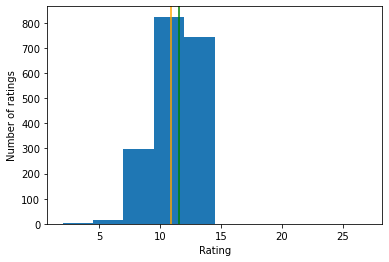

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(x=df_master['rating_out_of_10'], label='Histogram of Rating Values', range=[2,27])
plt.axvline(x=(df_master['rating_out_of_10']).mean(), label='Mean', color='Orange')
plt.axvline(x=(df_master['rating_out_of_10'][df_master['name'] == 'Charlie'].mean()), color='g')
plt.xlabel("Rating")

plt.ylabel("Number of ratings");

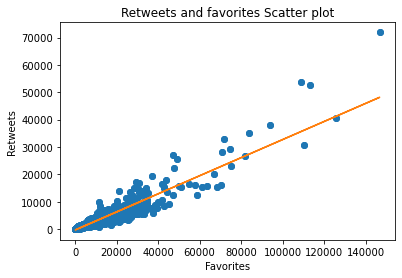

In [120]:
# The below chart is the visual display of the retweet/favorite count linear regression
import numpy as np

plt.scatter(df_master['favorite_count'], df_master['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

x = np.array(df_master['favorite_count'])
y = np.array(df_master['retweet_count'])

plt.plot(x, y, 'o', label="Regression Line")

m, b = np.polyfit(x, y, 1)



plt.plot(x, m*x + b);

In [121]:
import os

os.system('jupyter nbconvert --to html wrangle_act.ipynb')

[NbConvertApp] Converting notebook wrangle_act.ipynb to html
[NbConvertApp] Writing 802269 bytes to wrangle_act.html


0